# Proyecto Módulo 2: Simulación Montecarlo
### Tipo de cambio USD/MXN
###### Dario Giorgio Manghisi Ramírez & Luis Fernando Dávila González

## Objetivo General
* Simular "n" escenarios que nos permitan conocer la tendencia de un activo financiero en un plazo determinado. 

## Objetivos Específicos
* Importar y manipular datos desde una interfaz web.
* Obtener una función que genere valores aleatorios para el cálculo de rendimientos en tiempo mas uno (t+1).
* Graficar la línea de tendencia de los precios aleatorios en un plazo dado.
* Comparar la línea de tendencia aleatoria contra la línea de tendencia real.


## Modelos que representan el problema

##### Distribución Lognormal
Es una distribución de probabilidad de una variable aleatoria cuyo logaritmo está normalmente distribuido, es decir, si x es una variable aleatoria con una distribución normal, entonces exp(x) tiene distribución lognormal.

##### Plantemiento del problema

Con la implementación de este modelo, lo que se busca principalmente es tratar de “predecir” los precios de cierre en el tipo de cambio USD/MXN.


Con la finalidad de que algoritmo tuviera fines prácticos generamos un precio de cierre aleatorio en un rango [13.5,20] en el periodo t+1, de forma que al calcular el rendimiento logarítmico obtendríamos aquel rendimiento dado por componentes aleatorias, es decir un posible rendimiento de t+1.


Para lo que hicimos lo siguiente:

1) Descargar nuestra muestra de datos
* PT

2) Generar una variable aleatoria del mismo tamaño que la muestra.
* PT+1

3) Obtener los rendimientos logarítmicos
* ln(PT+1/PT)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web

C:\Users\ASUS X510UR 7\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
# Importamos los datos de los precios históricos del tipo de cambio USD/MXN
datos = pd.read_csv('USDMXN.csv')
datos

,FECHA,DATO
0,11/07/2014,13.5343
1,11/08/2014,13.4818
2,11/10/2014,13.6053
3,11/11/2014,13.6045
4,11/12/2014,13.5593
...,...,...
1310,11/01/2019,19.1814
1311,11/04/2019,19.2766
1312,11/05/2019,19.2766
1313,11/06/2019,19.1870


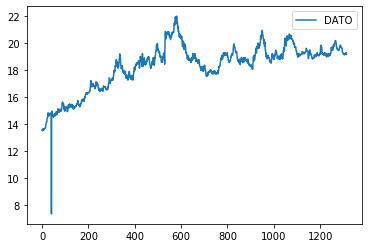

In [9]:
datos.plot()

In [10]:
datos.describe()

,DATO
count,1315.000000
mean,18.247229
std,1.701257
min,7.327000
25%,17.477300
50%,18.742701
75%,19.244150
max,21.959101


Una vez obtenidos los rendimientos normalizamos dichos rendimientos logarítmicos convirtiéndolos en una variable normalizada Z distribuida normalmente utilizando la media y la desviación de los rendimientos. De forma que:

Z = (Rt+1-mean)/std


In [11]:
import random

In [12]:
# Definimos función que determine un valor aleatorio de precio
def paleatorio1():
    l=np.arange(13.5, 16, 0.05).tolist()
    s = random.choice(l)
    for i in range(0,263):
        dato = s
    return s    
def paleatorio2():
    l2=np.arange(16, 18, 0.05).tolist()
    s =  s = random.choice(l2)
    for i in range(0,263):
        dato = s
    return s  
def paleatorio3():
    l3=np.arange(18.1, 21.5, 0.05).tolist()
    s = random.choice(l3)
    for i in range(0,264):
        dato = s
    return s  
def paleatorio4():
    l4=np.arange(18.2,20,0.05).tolist()
    s =  random.choice(l4)
    for i in range(0,263):
        dato = s
    return s 

def paleatorio5():
    l5=np.arange(18.0,19.0,0.05).tolist()
    s = random.choice(l5)
    for i in range(0,263):
        dato = s
    return s 

In [13]:
# Creamos un data frame con los precios aleatorios
x = []
for i in range(0,263):
     n0=paleatorio1()
     x.append(n0)
for i in range(264,527):
     n1=paleatorio2()
     x.append(n1)
for i in range(527,790):
     n2=paleatorio3()
     x.append(n2)
for i in range(790,1053):
     n3=paleatorio4()
     x.append(n3)
for i in range(1053,1316):
     n4=paleatorio5()
     x.append(n4)
x

   

[14.85000000000002,
 14.550000000000015,
 15.900000000000034,
 15.050000000000022,
 14.000000000000007,
 15.65000000000003,
 14.750000000000018,
 15.150000000000023,
 13.650000000000002,
 15.500000000000028,
 14.400000000000013,
 15.400000000000027,
 14.350000000000012,
 14.600000000000016,
 14.600000000000016,
 13.750000000000004,
 14.90000000000002,
 13.850000000000005,
 13.900000000000006,
 15.400000000000027,
 15.750000000000032,
 13.850000000000005,
 14.90000000000002,
 14.700000000000017,
 14.500000000000014,
 14.500000000000014,
 14.300000000000011,
 14.500000000000014,
 14.050000000000008,
 14.90000000000002,
 13.900000000000006,
 14.000000000000007,
 14.350000000000012,
 14.050000000000008,
 15.900000000000034,
 15.100000000000023,
 13.650000000000002,
 13.850000000000005,
 15.55000000000003,
 13.800000000000004,
 13.800000000000004,
 15.100000000000023,
 14.700000000000017,
 14.300000000000011,
 15.200000000000024,
 14.750000000000018,
 13.900000000000006,
 15.55000000000003,

In [14]:
dfx=pd.DataFrame(x,columns=['Variable aleatoria'])
dfx

,Variable aleatoria
0,14.85
1,14.55
2,15.90
3,15.05
4,14.00
...,...
1310,18.75
1311,18.40
1312,18.85
1313,18.60


In [15]:
final=pd.concat([datos,dfx],axis=1)
del final['FECHA']
final

,DATO,Variable aleatoria
0,13.5343,14.85
1,13.4818,14.55
2,13.6053,15.90
3,13.6045,15.05
4,13.5593,14.00
...,...,...
1310,19.1814,18.75
1311,19.2766,18.40
1312,19.2766,18.85
1313,19.1870,18.60


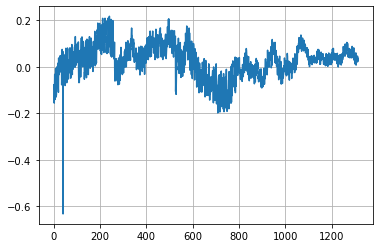

In [16]:
logR=np.log(final['DATO']/final['Variable aleatoria'])
logR.plot(grid=True,legend=False)

In [17]:
R=pd.DataFrame(logR,columns=['R'])
R

,R
0,-0.092773
1,-0.076250
2,-0.155860
3,-0.100977
4,-0.031985
...,...
1310,0.022747
1311,0.046541
1312,0.022379
1313,0.031071


In [18]:
R.describe()

,R
count,1315.000000
mean,0.024399
std,0.072550
min,-0.633102
25%,-0.016948
50%,0.029896
75%,0.068823
max,0.218131


In [19]:
#tomamos como parametros la media y std de los rendimientos logaritmicos
mean,std=0.023752,0.071561

In [20]:
m=[]
s=[]
for i in range(len(datos)):
    m.append(mean)
    s.append(std)
m,s

([0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.023752,
  0.

In [21]:
media=pd.DataFrame(m,columns=['M'])
media

,M
0,0.023752
1,0.023752
2,0.023752
3,0.023752
4,0.023752
...,...
1310,0.023752
1311,0.023752
1312,0.023752
1313,0.023752


In [22]:
STD=pd.DataFrame(s,columns=['S'])
STD


,S
0,0.071561
1,0.071561
2,0.071561
3,0.071561
4,0.071561
...,...
1310,0.071561
1311,0.071561
1312,0.071561
1313,0.071561


In [23]:
logR2=pd.concat([R,media,STD],axis=1)
logR2

,R,M,S
0,-0.092773,0.023752,0.071561
1,-0.076250,0.023752,0.071561
2,-0.155860,0.023752,0.071561
3,-0.100977,0.023752,0.071561
4,-0.031985,0.023752,0.071561
...,...,...,...
1310,0.022747,0.023752,0.071561
1311,0.046541,0.023752,0.071561
1312,0.022379,0.023752,0.071561
1313,0.031071,0.023752,0.071561


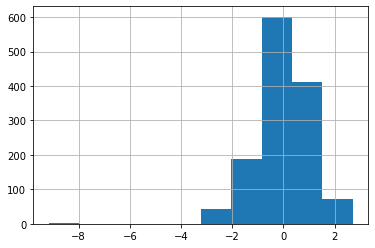

In [24]:
Z=((logR2['R']-logR2['M'])/logR2['S'])
Z.hist()
#Una distribución normal de la variable normalizada en N(media,std)

In [25]:
z=pd.DataFrame(Z,columns=['Z'])
z

,Z
0,-1.628326
1,-1.397442
2,-2.509910
3,-1.742980
4,-0.778869
...,...
1310,-0.014040
1311,0.318459
1312,-0.019186
1313,0.102282


In [26]:
F=pd.concat([datos,R,media,STD,z],axis=1)
F

,FECHA,DATO,R,M,S,Z
0,11/07/2014,13.5343,-0.092773,0.023752,0.071561,-1.628326
1,11/08/2014,13.4818,-0.076250,0.023752,0.071561,-1.397442
2,11/10/2014,13.6053,-0.155860,0.023752,0.071561,-2.509910
3,11/11/2014,13.6045,-0.100977,0.023752,0.071561,-1.742980
4,11/12/2014,13.5593,-0.031985,0.023752,0.071561,-0.778869
...,...,...,...,...,...,...
1310,11/01/2019,19.1814,0.022747,0.023752,0.071561,-0.014040
1311,11/04/2019,19.2766,0.046541,0.023752,0.071561,0.318459
1312,11/05/2019,19.2766,0.022379,0.023752,0.071561,-0.019186
1313,11/06/2019,19.1870,0.031071,0.023752,0.071561,0.102282


In [27]:
import random
n = 30
w = []
N=1000


In [28]:
datos.loc[datos['FECHA'] == '10/31/2019']

,FECHA,DATO
1309,10/31/2019,19.1814


In [29]:
#generamos una función que nos devuelve un precio futuro para el mes de noviembre de 2019 
#fijando el ultimo precio de venta del mes de octubre 19.1814
def preciorand():
    for i in range(n):
        preciorandom = 19.1814*np.exp(mean+(random.choice(Z)*std))
    return preciorandom

In [30]:
#genereamos la caminata
def walk(n):
    for i in range(n):
         w.append(preciorand())
    return w

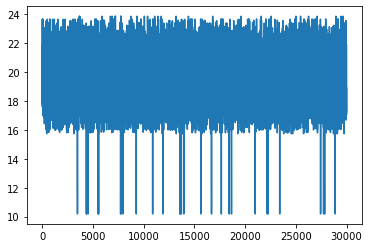

In [31]:
#llevamos a cabo la simulación
j=0
for i in range(N):
    j=walk(n)
plt.plot(j)


In [32]:
#buscaremos como objetivo los precios cercanos a la media
mu=np.mean(j)
mu


19.701595544459327

In [33]:
preciof=pd.DataFrame(j,columns=['proyección noviembre'])
preciof.describe()


,proyección noviembre
count,30000.000000
mean,19.701596
std,1.402809
min,10.184211
25%,18.839163
50%,19.757387
75%,20.575795
max,23.856868


La cantidad de número a graficar en nuestro problema fue de un intervalo de el último precio del mes a nuestra media.

Se tomaron 30 valores en la proyección de noviembre.

In [34]:
#establecemos un intervalo para elegir nuestros precios futuros
nov=[]
nov2=[]
for i in range(len(j)):
    if j[i]>=19 and j[i]<=mu:
        nov.append(j[i])
for k in range(30):
       y=random.choice(nov)
       nov2.append(y)
nov2
        

[19.688388701886783,
 19.341649940666652,
 19.317599103777766,
 19.33577190719999,
 19.15664980645158,
 19.280162783968077,
 19.100053791549723,
 19.625563879645153,
 19.324947078431343,
 19.594435024390226,
 19.333099092548384,
 19.234861861224474,
 19.660676848182295,
 19.186693866593732,
 19.174278761676636,
 19.270811105451607,
 19.239781475506412,
 19.47200447843134,
 19.53972928864864,
 19.424058918444427,
 19.679710385220147,
 19.361996807017523,
 19.504838089655156,
 19.067735407919976,
 19.333332883377295,
 19.376250633245366,
 19.511494856080205,
 19.118898685190587,
 19.4437186054054,
 19.36262051903485]

In [35]:
#datos de octubre y noviembre no se grafican bien
dataO=['19.771299','19.8239','19.669701','19.669701','19.669701','19.6527','19.5921','19.5921',
       '19.5921', '19.3011', '19.2749','19.2749','19.2547','19.148701','19.148701',
       '19.173901', '19.173901','19.173901', '19.098301','19.173401', '19.1814'
       '19.1814', '19.1814']
dataN=['19.1814','19.2766','19.2766','19.187','19.136']






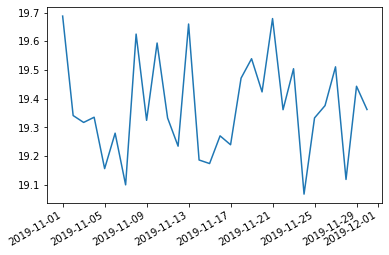

In [36]:
import datetime
times = pd.date_range('2019-11-01', periods=30)

fig, ax = plt.subplots(1)
fig.autofmt_xdate()
plt.plot(times, nov2)
plt.show()


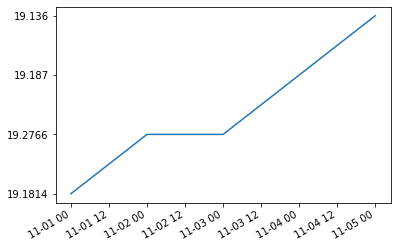

In [37]:
#Solo contamos con cinco datos del mes de noviembre
#Por lo tanto no se pudo graficar en el mismo plot que la simulación 
#Sin embargo se puede comparar los resultados gracias a este plot
times2 = pd.date_range('2019-11-01', periods=5)

fig, ax = plt.subplots(1)
fig.autofmt_xdate()
plt.plot(times2, dataN)
plt.show()

In [38]:
#Segundo ejemplo proyectar mes de octubre
datos.loc[datos['FECHA'] == '09/30/2019']
#obtenemos el útimo dato con el que contamos del mes de septiembre

,FECHA,DATO
1286,09/30/2019,19.771299


In [39]:
def preciorand2():
    for i in range(n2):
        preciorandom = 19.771299*np.exp(mean+(random.choice(Z)*std))
    return preciorandom

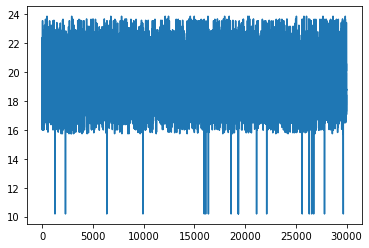

In [40]:
#Creamos la caminata y hacemos la simulación
n2 = 30
w = []
N=1000
j2=0
for i in range(N):
    j2=walk(n)
plt.plot(j2)


In [41]:
mu2=np.mean(j2)
mu2

19.696751299299912

In [42]:
preciof2=pd.DataFrame(j,columns=['proyección noviembre'])
preciof2.describe()

,proyección noviembre
count,30000.000000
mean,19.701596
std,1.402809
min,10.184211
25%,18.839163
50%,19.757387
75%,20.575795
max,23.856868


La cantidad de número a graficar en nuestro problema fue de un intervalo de el último precio del mes a nuestra media.

Se tomaron 30 valores en la proyección de octubre

In [43]:
#establecemos un intervalo para elegir nuestros precios futuros
oc=[]
oc2=[]
for i in range(len(j2)):
    if j2[i]>=19 and j2[i]<=mu2:
        oc.append(j[i])
for k in range(30):
       y2=random.choice(nov)
       oc2.append(y2)
oc2

[19.382573289008032,
 19.4271658628707,
 19.513132391586197,
 19.52372973537775,
 19.51474010674485,
 19.435239767315213,
 19.118375399999994,
 19.5496315585284,
 19.54265064026467,
 19.15582479999998,
 19.511715931441145,
 19.039744664338947,
 19.621721148122845,
 19.689323471999987,
 19.196242749999985,
 19.22497099470196,
 19.15582479999998,
 19.559532061060967,
 19.073219371061057,
 19.317599103777766,
 19.67741229043902,
 19.621721148122845,
 19.419290499731897,
 19.379169236101077,
 19.50413312506327,
 19.236394502202117,
 19.579451389791984,
 19.324947078431343,
 19.610554369533133,
 19.656429302013397]

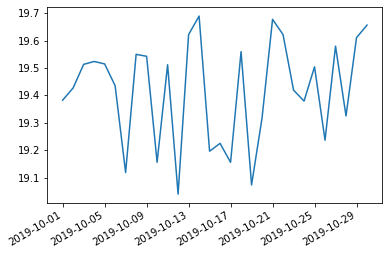

In [44]:

times3 = pd.date_range('2019-10-01', periods=30)

fig, ax = plt.subplots(1)
fig.autofmt_xdate()
plt.plot(times3, oc2)
plt.show()


## Conclusiones

Se puede decir que para este caso específico la simulación Montecarlo nos arrojó precios de cierre cercanos a la realidad. Probablemente se hubieran podido obtener resultados más certeros simulando una mayor cantidad de escenarios o si el activo fuera menos volátil nuestra Variable aleatoria normalizada Z estaría en un rango más corto obteniendo resultados mas certeros.

Sin embargo el rango de precios dados en la simulación de 1000 escenarios siguen siendo congruentes tomando en cuenta la volatilidad de los datos, es decir los valores topes (mínimo y máximo) se asemejan a la realidad fluctuante del tipo de cambio.


## Referencias

Introducción al análisis del riesgo financiero/Julio César Alonso, Luis Berggrum P., 2 ed Cali: Universidad Icesi 2010, 206 p; ISBN 978-8357-06-5, 1 Riesgo 2. Var 3. Medición de riesgo 4. Riesgo financiero 1 Tit., 658.155 cd 21
